**UNIVERSIDADE DE SÃO PAULO**<br>
**MBA DATA SCIENCE & ANALYTICS USP/ESALQ**<br>
**BIG DATA E DEPLOYMENT DE MODELOS**<br>
**Prof. Helder Prado Santos**<br>
Aluna: Luiza Batista Laquini<br>
Turma: DSA 241<br>

*coding: utf-8*

In [9]:
# ========= Instruções para o funcionamento dos scripts das aulas =============
# =============================================================================
# No diretório que os arquivos foram carregados, será necessário criar um ambi-
# ente virtual digitando o seguinte comando no terminal
# =============================================================================
# Qualquer sistema operacional: python3 -m venv venv
# =============================================================================
# Logo em seguida, será necessário acessar o ambiente virtual criado digitando
# o seguinte comando no terminal
# =============================================================================
# Windows: .\venv\Scripts\activate
# Linux: /venv/bin/activate
# =============================================================================
# Após acessar o ambiente virtual, irá aparecer o nome (venv) entre parênteses
# na parte lateral esquerda do terminal
# Em seguida, será necessário instalar os pacotes nessessários digitando o se-
# guinte comando no terminal
# =============================================================================
# Qualquer sistema operacional: pip install -r requirements.txt
# =============================================================================
# Após a instalação de todos os pacotes, você já poderar inicializar o serviço
# do MLflow digitando o seguinte comando no terminal
# =============================================================================
# Qualquer sistema operacional: mlflow ui
# =============================================================================
# Com o MLflow inicializado, você poderá acessar a aplicação via browser digi-
# tando o seguinte endereço no seu browser de preferência
# =============================================================================
# No browser (Firefox, Chorme, outro de preferência): http://localhost:5000
# =============================================================================
# Caso localhost não funcione, tente:
# http://0.0.0.0:5000 ou http://127.0.0.1:5000
# =============================================================================

### Modelos locais

In [10]:
# Pacotes que serão utilizados em todo o script
import pandas as pd
import mlflow
import statsmodels.api as sm
import json
import requests
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Coletando o caminho do dataset
caminho = "./data/tempodist.csv"

# Carregando o dataset
df_tempodist = pd.read_csv(caminho)

In [12]:
# Relembrando o dataset tempodist
df_tempodist

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [13]:
# Verificando as informações do dataset e possíveis valores nulos
df_tempodist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      10 non-null     int64
 1   distancia  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [14]:
# Verificando as variáveis descritivas das colunas
df_tempodist.describe()

,tempo,distancia
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


In [15]:
# Treinando um modelo localmente
modelo_nulo_local = sm.OLS.from_formula(
    formula="tempo ~ distancia", data=df_tempodist
).fit()

# Verificando seu output
print(modelo_nulo_local.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           0.000314
Time:                        16:41:41   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.2

Acima é a forma como estamos acostumados de treinar modelos localmente. Abaixo veja como treinar modelos no ambiente do mlflow:

### Modelos no ambiente do mlflow

In [16]:
# experiment = mlflow.get_experiment_by_name("Regressão Linear Simples - tempodist")

# if experiment is not None:
#     mlflow.delete_experiment(experiment.experiment_id)

In [20]:
# ==================== INICIALIZANDO COM O MLFLOW =============================

# Apontar a instância do mlflow para o servidor que está rodando a aplicação
mlflow.set_tracking_uri("http://localhost:5000")

# Criando o nosso primeiro experimento
mlflow.set_experiment(experiment_name="Regressão Linear Simples - df tempodist")

2024/10/20 16:44:42 INFO mlflow.tracking.fluent: Experiment with name 'Regressão Linear Simples - df tempodist' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/666240806145612744', creation_time=1729453482214, experiment_id='666240806145612744', last_update_time=1729453482214, lifecycle_stage='active', name='Regressão Linear Simples - df tempodist', tags={}>

2024/10/20 16:45:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 16:45:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modelo Nulo at: http://localhost:5000/#/experiments/666240806145612744/runs/28b9363bf63c4b79ab1e02c6c23ff444.
2024/10/20 16:45:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/666240806145612744.


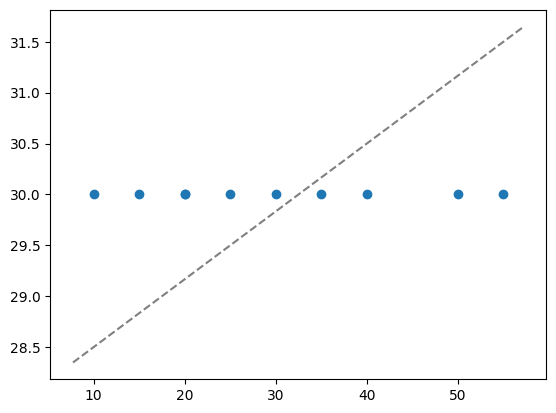

In [21]:
# ================== DEFINIÇÃO DOS INPUTS DO MODELO ===========================

# Modelo proposto: Modelo nulo

# Coleta dos metadados do dataset para o padrão do mlflow
dataset = mlflow.data.from_pandas(df_tempodist)
# Fórmula que serão utilizada no modelo
formula = "tempo ~ 1"

# Criando a nossa primeira run no mlflow
with mlflow.start_run(run_name="Modelo Nulo"):
    # ==================== INPUTS =============================================

    # Coleta dos metadados do dataset. O contexto pode ser utilizado para adi-
    # cionar mais uma informação de contexto do dataset, por exemplo: se ele é
    # um dataset de treino ou teste
    mlflow.log_input(dataset, context="training")

    # Parâmetros de entrada para serem coletados
    mlflow.log_param("Fórmula", formula)

    # ==================== MODELAGEM ==========================================

    # Treinamento do modelo
    modelo_nulo = sm.OLS.from_formula(formula=formula, data=df_tempodist).fit()

    # ==================== OUTPUTS ============================================

    # Registrando as métricas do modelo
    mlflow.log_metric("Estatística F", modelo_nulo.fvalue)
    mlflow.log_metric("F p-value", modelo_nulo.f_pvalue)
    mlflow.log_metric("R2", modelo_nulo.rsquared)

    # Coletando artefatos do modelo

    # Gráfico do comparativo dos dados observados versus fittedvalues
    fig, ax = plt.subplots()
    ax.scatter(df_tempodist["tempo"], modelo_nulo.fittedvalues)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", color="gray")

    # Registro do gráfico como um artefato do experimento
    mlflow.log_figure(
        fig, "observado_vs_fitted.png"
    )  # importante definir a extensão

    # Obtendo o sumário do modelo em formato de texto
    modelo_nulo_summary_texto = modelo_nulo.summary().as_text()

    # Registro do sumário como um artefato do experimento
    mlflow.log_text(
        modelo_nulo_summary_texto, "summary.txt"
    )  # importante definir a extensão do arquivo

    # Carregamento do modelo no experimento
    mlflow.statsmodels.log_model(modelo_nulo, "modelo-nulo")

Necessário registrar o modelo la no ui do mlflow!<br>
Em seguida usar o código abaixo como novo método para colocar em staging:

In [23]:
# Initialize an MLflow Client
client = mlflow.MlflowClient()

model_name = "tempo-distancia"
stage = "Staging"

client.transition_model_version_stage(
    name=model_name, version=3, stage=stage
)

# The accepted values for <stage> are: Staging|Archived|Production|None.

<ModelVersion: aliases=[], creation_timestamp=1729453567798, current_stage='Staging', description='', last_updated_timestamp=1729453615638, name='tempo-distancia', run_id='28b9363bf63c4b79ab1e02c6c23ff444', run_link='', source='mlflow-artifacts:/666240806145612744/28b9363bf63c4b79ab1e02c6c23ff444/artifacts/modelo-nulo', status='READY', status_message='', tags={}, user_id='', version='3'>

In [24]:
# =================== UTILIZANDO MODELOS EM PRODUÇÃO ==========================

# Carregando o modelo tempo-distancia em estado staging 
modelo_nulo_carregado = mlflow.statsmodels.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

In [25]:
# Verificando o R2
modelo_nulo_carregado.rsquared

np.float64(0.0)

modelo nulo possui Rsquared zero

In [26]:
# Verificando os fittedvalues
modelo_nulo_carregado.fittedvalues

0    30.0
1    30.0
2    30.0
3    30.0
4    30.0
5    30.0
6    30.0
7    30.0
8    30.0
9    30.0
dtype: float64

(Apenas o valor de intercepto)

2024/10/20 17:01:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 17:01:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modelo Final at: http://localhost:5000/#/experiments/666240806145612744/runs/e5c2a8f85cd542ed8e9f4507f0ca9a83.
2024/10/20 17:01:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/666240806145612744.


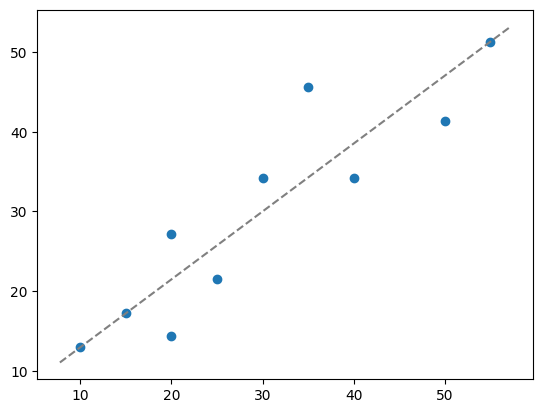

In [29]:
# ============================ MODELO FINAL ===================================

# Modelo proposto: Modelo final

# Coleta dos metadados do dataset para o padrão do mlflow
dataset = mlflow.data.from_pandas(df_tempodist)
# Fórmula que serão utilizada no modelo
formula = "tempo ~ distancia"

# %%
# Criando uma nova run no mlflow
with mlflow.start_run(run_name="Modelo Final"):
    # =============================== INPUTS ==================================

    # Coleta dos metadados do dataset. O contexto pode ser utilizado para adi-
    # cionar mais uma informação de contexto do dataset, por exemplo: se ele é
    # um dataset de treino ou teste
    mlflow.log_input(dataset, context="training")

    # Parâmetros de entrada para serem coletados
    mlflow.log_param("Fórmula", formula)

    # ============================= MODELAGEM =================================

    # Treinamento do modelo
    modelo_final = sm.OLS.from_formula(
        formula=formula, data=df_tempodist
    ).fit()

    # ============================= OUTPUTS ===================================

    # Registrando as métricas do modelo
    mlflow.log_metric("Estatística F", modelo_final.fvalue)
    mlflow.log_metric("F p-value", modelo_final.f_pvalue)
    mlflow.log_metric("R2", modelo_final.rsquared)

    # Coletando artefatos do modelo

    # Gráfico do comparativo dos dados observados versus fittedvalues
    fig, ax = plt.subplots()
    ax.scatter(df_tempodist["tempo"], modelo_final.fittedvalues)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", color="gray")

    # Registro do gráfico como um artefato do experimento
    mlflow.log_figure(
        fig, "observado_vs_fitted.png"
    )  # importante definir a extensão

    # Obtendo o sumário do modelo em formato de texto
    modelo_final_summary_texto = modelo_final.summary().as_text()

    # Registro do sumário como um artefato do experimento
    mlflow.log_text(
        modelo_final_summary_texto, "summary.txt"
    )  # importante definir a extensão do arquivo

    # Carregamento do modelo no experimento
    mlflow.statsmodels.log_model(modelo_final, "modelo-final")

In [28]:
# Registrando uma nova versão do modelo tempo-dist (fazer isso no ui)
# Agora o modelo tempo-dist terá duas versões, o modelo nulo na versão 1 e o
# modelo final na versão 2.

# Initialize an MLflow Client
client = mlflow.MlflowClient()

model_name = "tempo-distancia"
stage = "Staging"

client.transition_model_version_stage(
    name=model_name, version=4, stage=stage
)

# The accepted values for <stage> are: Staging|Archived|Production|None.

# Após promover o modelo final para a fase de 'staging', o modelo nulo automa-
# ticamente o modelo anterior será e o novo modelo ficará registrado no estágio
# de 'archived' -->> ACONTECE SOMENTE NO 'OLD MODEL REGISTRY UI' (desligar bo-
# tão 'New model registry UI')

<ModelVersion: aliases=[], creation_timestamp=1729453888054, current_stage='Staging', description='', last_updated_timestamp=1729453927710, name='tempo-distancia', run_id='ce8ae1a818404e6eb6e79b0391ca6d4a', run_link='', source='mlflow-artifacts:/666240806145612744/ce8ae1a818404e6eb6e79b0391ca6d4a/artifacts/modelo-final', status='READY', status_message='', tags={}, user_id='', version='4'>

In [30]:
# Carregando novamente o modelo tempo-dist na fase 'staging'
modelo_fase_staging = mlflow.statsmodels.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

In [31]:
# Verificando o R2
modelo_fase_staging.rsquared

np.float64(0.8194256756756757)

In [32]:
# Verificando os fittedvalues
modelo_fase_staging.fittedvalues

0    17.229730
1    14.391892
2    27.162162
3    34.256757
4    41.351351
5    21.486486
6    12.972973
7    51.283784
8    45.608108
9    34.256757
dtype: float64

In [33]:
# Realizando um predict
predict_novo_modelo_staging = modelo_fase_staging.predict(
    pd.DataFrame({"distancia": [20]})
)

# Verificando o predict
print(predict_novo_modelo_staging)

0    34.256757
dtype: float64


Ir no mlflow e colocar o modelo em 'staging' para 'production' antes de seguir 

In [34]:
# ==================== GESTÃO DO CICLO DE VIDA DOS MODELOS ====================

# Ciclo esperado: Adatação -> Produção -> Arquivamento

# Promovendo o modelo final de fase de adaptação para a fase de produção
# Agora a versão 2 do modelo (modelo final) está em produção

stage = 'production'

# Carregando modelo tempo-dist em produção (production)
modelo_em_producao = mlflow.statsmodels.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

### APIs

In [41]:
# ===================== ENTENDENDO E CONSUMINDO APIS ==========================

# Alguns métodos HTTP bastante utilizados em requisições de APIs:

# GET: recupera dados do servidor
# POST: envia dados ao servidor para processamento.

# Usando o GET
fatos_cachorros = requests.get(
    "https://dogapi.dog/api/v2/facts", # API pública de fatos sobre cães
    headers={"Content-Type": "application/json"},
)
fatos_cachorros

<Response [200]>

In [36]:
# Em uma requisição HTTP, o servidor pode retornar diferentes tipos de respostas, representadas por **códigos de status** que indicam o resultado da solicitação. Esses códigos são divididos em cinco categorias principais:

# ### 1. **Respostas de Informação (100-199)**
# Esses códigos indicam que a requisição foi recebida e está em processamento:

# - **100 Continue**: O servidor recebeu a parte inicial da solicitação e o cliente deve continuar enviando o restante.
# - **101 Switching Protocols**: O servidor aceita mudar o protocolo conforme solicitado pelo cliente.

# ### 2. **Respostas de Sucesso (200-299)**
# Esses códigos indicam que a requisição foi processada com sucesso:

# - **200 OK**: A requisição foi bem-sucedida, e o servidor retornou o recurso solicitado.
# - **201 Created**: A requisição foi bem-sucedida e um novo recurso foi criado.
# - **202 Accepted**: A solicitação foi aceita para processamento, mas ainda não foi concluída.
# - **204 No Content**: A solicitação foi bem-sucedida, mas não há corpo de resposta a ser enviado.

# ### 3. **Redirecionamento (300-399)**
# Esses códigos indicam que o cliente precisa realizar mais ações para completar a solicitação:

# - **301 Moved Permanently**: O recurso foi movido permanentemente para um novo URL.
# - **302 Found**: O recurso foi temporariamente movido para outro URL.
# - **304 Not Modified**: O conteúdo não foi alterado desde a última solicitação, portanto, o cliente pode usar a versão em cache.

# ### 4. **Erros do Cliente (400-499)**
# Esses códigos indicam que houve um erro por parte do cliente ao fazer a requisição:

# - **400 Bad Request**: A requisição está malformada ou contém dados inválidos.
# - **401 Unauthorized**: A solicitação requer autenticação.
# - **403 Forbidden**: O servidor entendeu a solicitação, mas está recusando o acesso.
# - **404 Not Found**: O recurso solicitado não foi encontrado no servidor.
# - **429 Too Many Requests**: O cliente enviou muitas requisições em um curto período de tempo.

# ### 5. **Erros do Servidor (500-599)**
# Esses códigos indicam que o servidor encontrou um erro ao tentar processar a requisição:

# - **500 Internal Server Error**: Ocorreu um erro genérico no servidor.
# - **502 Bad Gateway**: O servidor recebeu uma resposta inválida de outro servidor ao tentar cumprir a solicitação.
# - **503 Service Unavailable**: O servidor está temporariamente indisponível, geralmente devido a manutenção ou sobrecarga.
# - **504 Gateway Timeout**: O servidor agiu como um gateway ou proxy e não recebeu uma resposta a tempo.

# Esses são os principais tipos de respostas em requisições HTTP, cada uma servindo para informar o cliente sobre o estado da solicitação e, se necessário, orientar sobre as próximas ações.

In [42]:
# Coletando a resposta da requisição em formaton JSON
fatos_cachorros = fatos_cachorros.json()
fatos_cachorros

{'data': [{'id': '2cd15e5a-1013-4f23-abd5-45cbdceba59c',
   'type': 'fact',
   'attributes': {'body': 'Female dogs carry puppies for about nine weeks before birth.'}}]}

In [40]:
# Acessando os campos e valores da resposta da API
print(fatos_cachorros["data"][0]["attributes"]["body"])

The breed Lundehune has 6 toes and can close its ears.


In [ ]:
# =========== SERVINDO MODELOS EM PRODUÇÃO USANDO A API DO MLFLOW =============

# Acesse um novo terminal e ative o ambiente virtual que foi criado. Não feche
# o terminal que está rodando o Mlflow.
# Verifique o Passo 2 do "Instruções Aula - Big Data e Deployment de Modelos"
# para mais dúvidas.

# Para acessar um novo ambiente virtual
# Digite no terminal (no mesmo diretório onde a pasta venv se encontra):
# =============================================================================
# cd <DIRETORIO_ONDE_O_VENV_FOI_CRIADO>
# Windows: .\venv\Scripts\activate
# Linux/macOS: source /venv/bin/activate
# O nome (venv) deverá aparecer no início do campo do terminal

# Adicione a variável de ambiente para o rastreamento de onde está o Mlflow
# Digite no terminal:
# =============================================================================
# Linux/macOS: EXPORT MLFLOW_TRACKING_URI=http://localhost:5000
# Windows: SET MLFLOW_TRACKING_URI=http://localhost:5000
# =============================================================================

# Sirva o modelo tempo-distancia em fase de produção para ser acessado na
# porta 5200 via API do Mlflow
# Digite no terminal:
# =============================================================================
# $env:MLFLOW_TRACKING_URI="http://localhost:5000"
# mlflow models serve -m models:/tempo-distancia/production -p 5200 --no-conda
# =============================================================================

In [43]:
# Criando um dataframe para realizar um predict no nosso modelo em produção via
# API do Mlflow
df_novos_dados = pd.DataFrame({"distancia": [20]})
df_novos_dados

,distancia
0,20


In [45]:
# Transformando os dados para o formato requisitação pela documentação da API
#  do mlflow
dados_transformados = json.dumps(
    {"dataframe_records": df_novos_dados.to_dict(orient="records")}
)
dados_transformados

'{"dataframe_records": [{"distancia": 20}]}'

In [47]:
# CONSUMIR DO MODELO SERVIDO
# Realizando a requisição ao modelo via API do Mlflow e coletando a resposta
response = requests.post(
    #url="http://localhost:5200/invocations",
    url="http://127.0.0.1:5200/invocations",
    data=dados_transformados,
    headers={"Content-Type": "application/json"},
)

# Verificando o retorno em formato de texto
response.text

'{"predictions": [{"0": 34.256756756756744}]}'

In [49]:
# Verificando o retorno em formato JSON, que é compatível com o formato dicio-
# nário Python
predict = response.json()

# Acessando o valor do predict
print(predict["predictions"][0]["0"])

34.256756756756744


### deployment de um modelo HLM2

In [50]:
# =================== DEPLOYMENT DE UM MODELO HLM2 ============================

# Carregando o dataset
df_estudante_escola = pd.read_csv("./data/estudante_escola.csv")

# Relembrando o dataset df_estudante_escola
df_estudante_escola

,estudante,escola,desempenho,horas,texp
0,1,1,25.0,11,3.6
1,2,1,52.0,23,3.6
2,3,1,52.0,25,3.6
3,4,1,30.0,14,3.6
4,5,1,51.0,24,3.6
...,...,...,...,...,...
353,354,10,46.5,28,3.9
354,355,10,21.0,9,3.9
355,356,10,42.0,27,3.9
356,357,10,14.0,7,3.9


In [51]:
# Verificando as informações do dataset e possíveis valores nulos
df_estudante_escola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudante   358 non-null    int64  
 1   escola      358 non-null    int64  
 2   desempenho  358 non-null    float64
 3   horas       358 non-null    int64  
 4   texp        358 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 14.1 KB


In [52]:
# Verificando as variáveis descritivas das colunas
df_estudante_escola[["escola", "desempenho"]].groupby(
    by=["escola"]
).describe()

desempenho                                                          
            count       mean        std   min     25%    50%     75%    max
escola                                                                     
1            47.0  36.765957  13.398917  15.0  25.500  33.00  48.000   65.0
2            25.0  21.400000   6.204837  11.0  17.000  22.00  25.000   35.0
3            48.0  67.125000  14.203124  37.0  59.000  66.00  77.250  100.0
4            20.0  55.325000  13.323184  25.0  48.250  55.25  66.375   77.5
5            48.0  19.270833   5.642693   6.5  15.500  19.00  22.500   32.5
6            30.0  33.966667   7.921961  18.5  29.125  33.25  39.875   49.0
7            28.0  57.532143  26.112904  15.3  39.750  55.30  77.900  100.0
8            35.0  75.428571   9.506300  52.0  69.500  77.00  82.500   93.0
9            44.0  18.556818   3.360537  10.5  16.250  18.50  21.000   25.0
10           33.0  38.590909   8.690381  14.0  34.500  41.50  44.000   50.5

In [53]:
# Criando o experimento para receber os modelos
mlflow.set_experiment(experiment_name="Desempenho de estudantes")

2024/10/20 17:44:57 INFO mlflow.tracking.fluent: Experiment with name 'Desempenho de estudantes' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/479809308707295081', creation_time=1729457097597, experiment_id='479809308707295081', last_update_time=1729457097597, lifecycle_stage='active', name='Desempenho de estudantes', tags={}>

In [55]:
# ====================== PRIMEIRO MODELO DO EXPERIMENTO =======================

# Modelo proposto: Modelo nulo OLS

# Coleta dos metadados do dataset para o padrão do mlflow
dataset = mlflow.data.from_pandas(df_estudante_escola)
# Fórmula que serão utilizada no modelo
formula = "desempenho ~ 1"

# Permite que o Mlflow colete os logs (parámetros, métricas e artefatos) auto-
# maticamente
mlflow.statsmodels.autolog(
    log_models=True,  # registro do modelo
    #log_data=True,  # registro dos metadados do dataset
    disable=False,  # habilitar o autolog
    registered_model_name=None,  # adicionar um nome default para o modelo
)

# Para desabilitar o autolog
# mlflow.statsmodels.autolog(disable=True)

2024/10/20 17:45:31 WARNING mlflow.utils.autologging_utils: MLflow statsmodels autologging is known to be compatible with 0.11.1 <= statsmodels <= 0.14.3, but the installed version is 0.14.4. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a compatible version, or try upgrading MLflow.


In [56]:
# Criando a primeira run desse experimento no mlflow
with mlflow.start_run(run_name="Modelo Nulo"):

    # ==================== INPUTS =============================================

    # Parâmetros de entrada e os metadados do dataset são coletadas de forma
    # automática por conta do comando mlflow.statsmodels.autolog()

    # ============================= MODELAGEM =================================

    # Treinamento do modelo
    modelo_estudante_escola_nulo = sm.OLS.from_formula(
        formula=formula, data=df_estudante_escola
    ).fit()

    # ==================== OUTPUTS ============================================

    # Métricas e artefatos do modelo são coletadas de forma automática por con-
    # ta do comando mlflow.statsmodels.autolog()

2024/10/20 17:46:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 17:46:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modelo Nulo at: http://localhost:5000/#/experiments/479809308707295081/runs/6a699a8708f74dad8097d04ee9d9b458.
2024/10/20 17:46:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/479809308707295081.


In [57]:
# ====================== SEGUNDO MODELO DO EXPERIMENTO ========================

# Modelo proposto: Modelo nulo HLM2

# Fórmula que serão utilizada no modelo
grupo = "escola"
componente_fixo = "desempenho ~ 1"
componente_aleatorio = "1"

# Criando a segunda run desse experimento no mlflow
with mlflow.start_run(run_name="Modelo Nulo HLM2"):

    # ==================== INPUTS =============================================

    # Parâmetros de entrada e os metadados do dataset são coletadas de forma
    # automática por conta do comando mlflow.statsmodels.autolog()

    # ============================= MODELAGEM =================================

    # Treinamento do modelo
    modelo_estudante_escola_nulo_hlm2 = sm.MixedLM.from_formula(
        formula=componente_fixo,
        groups=grupo,
        re_formula=componente_aleatorio,
        data=df_estudante_escola,
    ).fit()

    # ==================== OUTPUTS ============================================

    # Métricas e artefatos do modelo são coletadas de forma automática por con-
    # ta do comando mlflow.statsmodels.autolog()

2024/10/20 17:47:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 17:47:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modelo Nulo HLM2 at: http://localhost:5000/#/experiments/479809308707295081/runs/3db72120c5fc4bbd8649282c2f72f91d.
2024/10/20 17:47:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/479809308707295081.


In [58]:
# ====================== TERCEIRO MODELO DO EXPERIMENTO =======================

# Modelo proposto: Modelo com interceptos aleatórios HLM2

# Fórmula que serão utilizada no modelo
grupo = "escola"
componente_fixo = "desempenho ~ horas"
componente_aleatorio = "1"

# Criando a terceira run desse experimento no mlflow
with mlflow.start_run(run_name="Modelo com Interceptos Aleatórios HLM2"):

    # ==================== INPUTS =============================================

    # Parâmetros de entrada e os metadados do dataset são coletadas de forma
    # automática por conta do comando mlflow.statsmodels.autolog()

    # ============================= MODELAGEM =================================

    # Treinamento do modelo
    modelo_estudante_escola_intercept_hlm2 = sm.MixedLM.from_formula(
        formula=componente_fixo,
        groups=grupo,
        re_formula=componente_aleatorio,
        data=df_estudante_escola,
    ).fit()

    # ==================== OUTPUTS ============================================

    # Métricas e artefatos do modelo são coletadas de forma automática por con-
    # ta do comando mlflow.statsmodels.autolog()

2024/10/20 17:49:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 17:49:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modelo com Interceptos Aleatórios HLM2 at: http://localhost:5000/#/experiments/479809308707295081/runs/13d7337bd5734bedb76e00b902a6a49e.
2024/10/20 17:49:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/479809308707295081.


In [59]:
# ====================== QUARTO MODELO DO EXPERIMENTO =======================

# Modelo proposto: Modelo com interceptos e inclinações aleatórios HLM2

# Fórmula que serão utilizada no modelo
grupo = "escola"
componente_fixo = "desempenho ~ horas"
componente_aleatorio = "horas"

# Criando a quarta run desse experimento no mlflow
with mlflow.start_run(
    run_name="Modelo com Interceptos e Inclinações Aleatórios HLM2"
):

    # ==================== INPUTS =============================================

    # Parâmetros de entrada e os metadados do dataset são coletadas de forma
    # automática por conta do comando mlflow.statsmodels.autolog()

    # ============================= MODELAGEM =================================

    # Treinamento do modelo
    modelo_estudante_escola_intercept_inclin_hlm2 = sm.MixedLM.from_formula(
        formula=componente_fixo,
        groups=grupo,
        re_formula=componente_aleatorio,
        data=df_estudante_escola,
    ).fit()

    # ==================== OUTPUTS ============================================

    # Métricas e artefatos do modelo são coletadas de forma automática por con-
    # ta do comando mlflow.statsmodels.autolog()

2024/10/20 17:49:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 17:49:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modelo com Interceptos e Inclinações Aleatórios HLM2 at: http://localhost:5000/#/experiments/479809308707295081/runs/94aa27518243483995c3d77fa951ea32.
2024/10/20 17:49:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/479809308707295081.


In [60]:
# ====================== QUNTO MODELO DO EXPERIMENTO ==========================

# Modelo proposto: Modelo final com interceptos e inclinações aleatórios HLM2

# Fórmula que serão utilizada no modelo
grupo = "escola"
componente_fixo = "desempenho ~ horas + texp + horas:texp"
componente_aleatorio = "horas"

# Criando a quinta run desse experimento no mlflow
with mlflow.start_run(
    run_name="Modelo Final com Interceptos e Inclinações Aleatórios HLM2"
):

    # ==================== INPUTS =============================================

    # Parâmetros de entrada e os metadados do dataset são coletadas de forma
    # automática por conta do comando mlflow.statsmodels.autolog()

    # ============================= MODELAGEM =================================

    # Treinamento do modelo
    modelo_estudante_escola_final_hlm2 = sm.MixedLM.from_formula(
        formula=componente_fixo,
        groups=grupo,
        re_formula=componente_aleatorio,
        data=df_estudante_escola,
    ).fit()

    # ==================== OUTPUTS ============================================

    # Métricas e artefatos do modelo são coletadas de forma automática por con-
    # ta do comando mlflow.statsmodels.autolog()

2024/10/20 17:49:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 17:49:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Modelo Final com Interceptos e Inclinações Aleatórios HLM2 at: http://localhost:5000/#/experiments/479809308707295081/runs/fe7cd7969c5b4e09af5c09cea215befa.
2024/10/20 17:49:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/479809308707295081.


In [ ]:
# Necessário ir lá e registrar o modelo para a fase de produção 
# para ser consumido via API do Mlflow

In [ ]:
# =================== SERVINDO O MODELO HLM2 EM PRODUÇÃO  =====================

# Acesse um novo terminal e ative o ambiente virtual que foi criado. Não feche
# o terminal que está rodando o Mlflow.
# Verifique o Passo 2 do "Instruções Aula - Big Data e Deployment de Modelos"
# para mais dúvidas.

# Para acessar um novo ambiente virtual
# Digite no terminal (no mesmo diretório onde a pasta venv se encontra):
# =============================================================================
# cd <DIRETORIO_ONDE_O_VENV_FOI_CRIADO>
# Windows: .\venv\Scripts\activate
# Linux/macOS: source /venv/bin/activate
# O nome (venv) deverá aparecer no início do campo do terminal

# Adicione a variável de ambiente para o rastreamento de onde está o Mlflow
# Digite no terminal:
# =============================================================================
# Linux/macOS: EXPORT MLFLOW_TRACKING_URI=http://localhost:5000
# Windows: SET MLFLOW_TRACKING_URI=http://localhost:5000
# =============================================================================

# Sirva o modelo estudante-escola em fase de produção para ser acessado na
# porta 5300 via API do Mlflow
# Digite no terminal:
# =============================================================================
# mlflow models serve -m models:/estudante-escola/production -p 5300 --no-conda
# =============================================================================

In [61]:
# Criando um dataframe para realizar um predict no nosso modelo em produção via
# API do Mlflow
df_novos_dados = pd.DataFrame({"escola": ["1"], "horas": [11], "texp": [3.6]})
df_novos_dados

,escola,horas,texp
0,1,11,3.6


In [62]:
# Transformando os dados para o formato requisitação pela documentação da API
#  do mlflow
dados_transformados = json.dumps(
    {"dataframe_records": df_novos_dados.to_dict(orient="records")}
)
dados_transformados

'{"dataframe_records": [{"escola": "1", "horas": 11, "texp": 3.6}]}'

In [63]:
# Realizando a requisição ao modelo via API do Mlflow e coletando a resposta
response = requests.post(
    #url="http://localhost:5300/invocations",
    url="http://127.0.0.1:5300/invocations",
    data=dados_transformados,
    headers={"Content-Type": "application/json"},
)

# Verificando o retorno da requisição
response.json()

# Lembrando que o predict da função MixedLM retorna o resultado do componente
# fixo

{'predictions': [{'0': 21.885818777438494}]}

In [64]:
# Coletando o predict dentro do objeto json
response.json()['predictions'][0]["0"]

# =========================== FIM DO SCRIPT ===================================

21.885818777438494